In [5]:
import db_dtypes
print("db-dtypes installed successfully!")

db-dtypes installed successfully!


In [6]:
# import seaborn
import seaborn as sns

In [7]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import matplotlib.pyplot as plt

# Path to your service account key
key_path = "/mnt/c/Users/linze/Documents/sctp/dsai-module-2-final-project/final-project-57294-63425154d98b.json"

# Set up the credentials
creds = service_account.Credentials.from_service_account_file(key_path)

# Initialize BigQuery client with credentials
client = bigquery.Client(credentials=creds)

# Specify the dataset and table IDs
dataset_id = 'ds_olist_fact'
table_id = 'fact_order'

# Write the SQL query to select data from the view
query = f"""
SELECT *
FROM `{dataset_id}.{table_id}`
"""

# Run the query and get the result as a pandas DataFrame
df = client.query(query).to_dataframe()

# Print the first few rows of the dataframe
print(df.head())


/home/cindy/miniconda3/envs/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                        customer_id                          order_id  \
0  8886130db0ea6e9e70ba0b03d7c0d286  a2e4c44360b4a57bdff22f3a4630c173   
1  b2191912d8ad6eac2e4dc3b6e1459515  132f1e724165a07f6362532bfb97486e   
2  622e13439d6b5a0b486c435618b2679e  809a282bbd5dbcabb6f2f724fca862ec   
3  b6f6cbfc126f1ae6723fe2f9b3751208  e5215415bb6f76fe3b7cb68103a0d1c0   
4  b106b360fe2ef8849fbbd056f777b4d5  71303d7e93b399f5bcd537d124c0bcfa   

  order_status order_purchase_timestamp  payment_value payment_type  \
0     approved      2017-02-06 20:18:17          61.62  credit_card   
1     approved      2017-04-25 01:25:34         179.46  credit_card   
2     canceled      2016-09-13 15:24:19          40.95  credit_card   
3     canceled      2016-10-22 08:25:27          61.99      voucher   
4     canceled      2016-10-02 22:07:52         109.34  credit_card   

  purchase_month_and_year  purchase_year  
0                 2017-02           2017  
1                 2017-04           2017  
2    

In [8]:
df.describe()

,order_purchase_timestamp,payment_value,purchase_year
count,103886,103886.000000,103886.0
mean,2017-12-29 21:48:47.671803,154.100380,2017.535866
min,2016-09-04 21:15:19,0.000000,2016.0
25%,2017-09-10 09:01:08.750000,56.790000,2017.0
50%,2018-01-17 14:07:54,100.000000,2018.0
75%,2018-05-03 18:35:58.250000,171.837500,2018.0
max,2018-10-17 17:30:18,13664.080000,2018.0
std,NaN,217.494064,0.505349


###Total Sales by month for past years

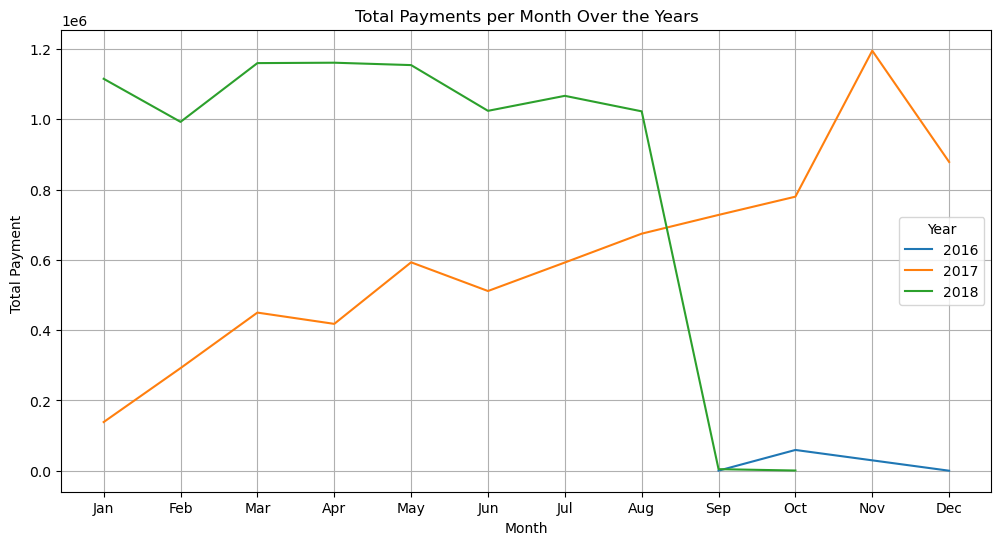

In [9]:
# Ensure 'purchase_month_and_year' is in datetime format
df['purchase_month_and_year'] = pd.to_datetime(df['purchase_month_and_year'])

# Extract year and month separately
df['purchase_year'] = df['purchase_month_and_year'].dt.year
df['purchase_month'] = df['purchase_month_and_year'].dt.month  # Extract month (1-12)

# Group by 'purchase_month' and 'purchase_year' to sum 'payment_value'
df_grouped = df.groupby(['purchase_month', 'purchase_year'])['payment_value'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='purchase_month', y='payment_value', hue='purchase_year', palette="tab10")

# Customize x-axis to show only month names (Jan–Dec)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Month')
plt.ylabel('Total Payment ')
plt.title('Total Payments per Month Over the Years')
plt.legend(title="Year")
plt.grid(True)
plt.show()

###### The followin month is the best seller month

### Nov 2017 and Jan-May 2018

Sales trend analysis

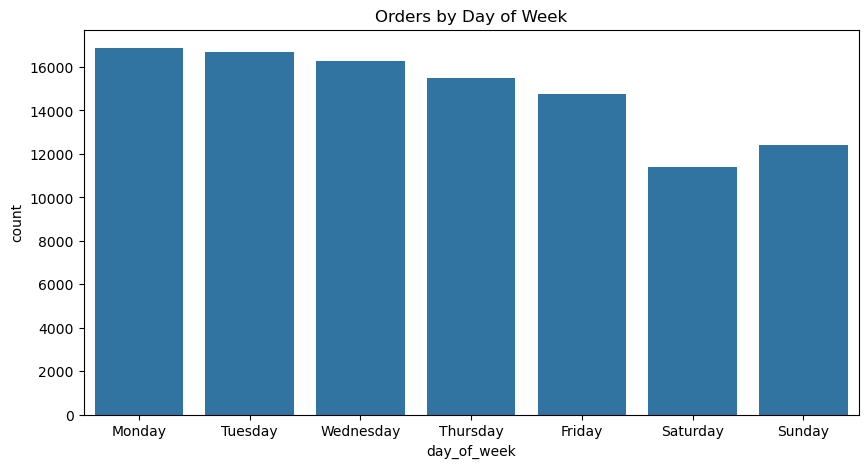

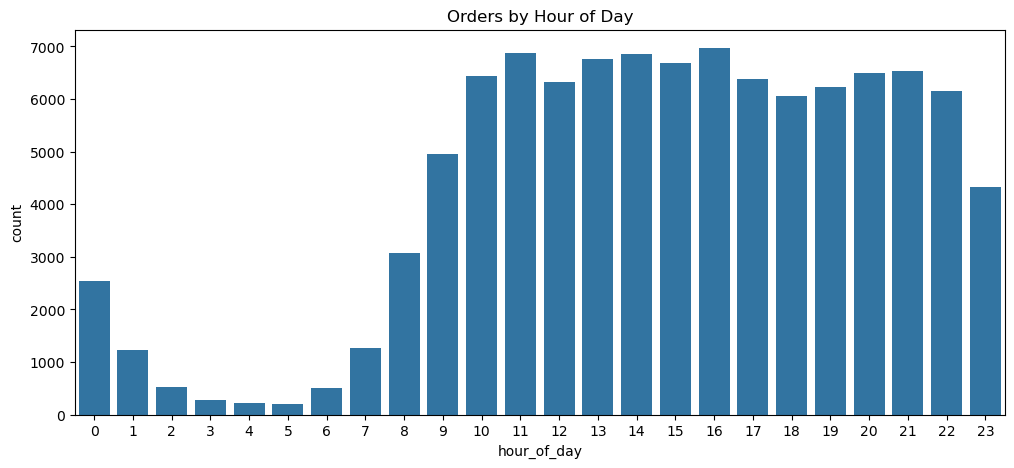

In [10]:
# plot chart for average payment value per weekday over years vs average order 
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
# Daily/weekly patterns
df['day_of_week'] = df['order_purchase_timestamp'].dt.day_name()
df['hour_of_day'] = df['order_purchase_timestamp'].dt.hour

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Orders by Day of Week')
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='hour_of_day')
plt.title('Orders by Hour of Day')
plt.show()

Finding:
9am-23am is the peak selling hours


Customer Analysis

 ####Recency: How recently a customer has made a purchase. Frequency: How often a customer makes a purchase. Monetary value: How much money a customer spends on purchases.

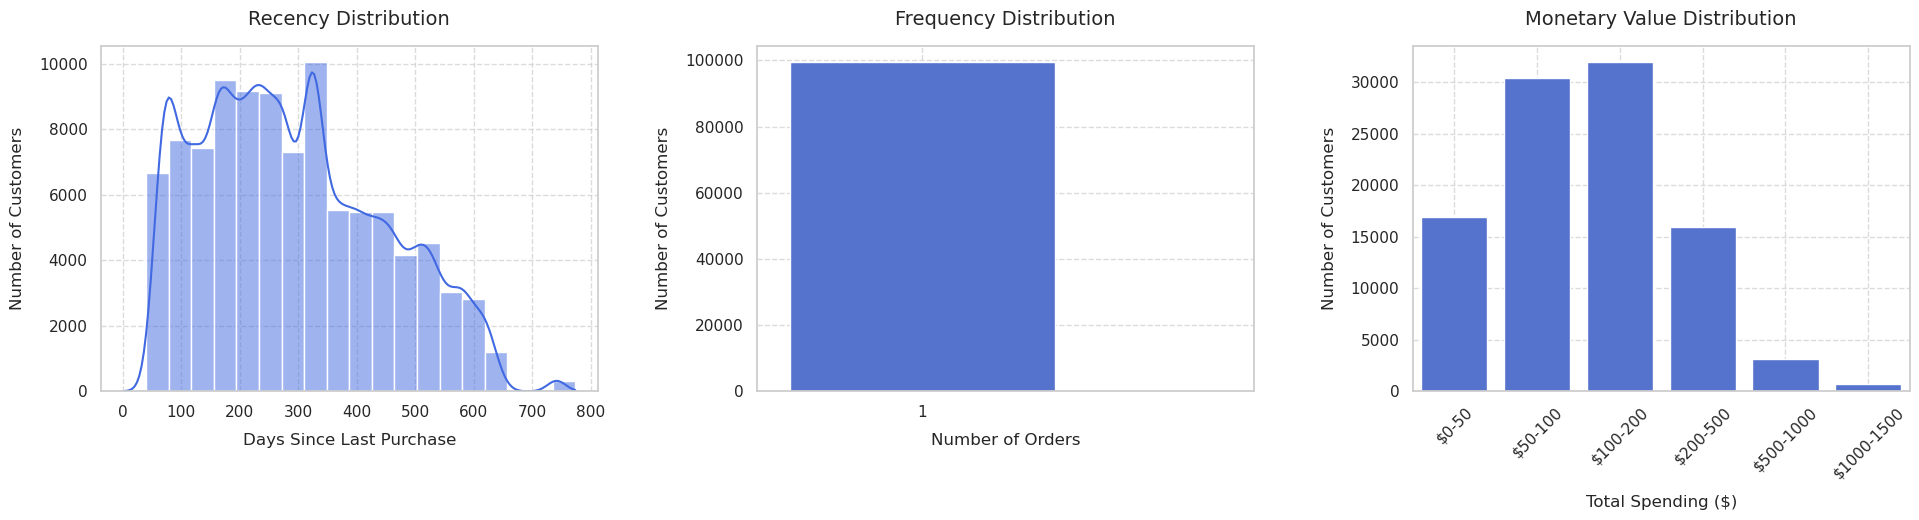

RFM ANALYSIS SUMMARY STATISTICS

RECENCY (Days since last purchase):
count    99440.0
mean       290.9
std        153.7
min          1.0
25%        167.0
50%        272.0
75%        401.0
90%        519.0
95%        573.0
max        773.0
Name: recency, dtype: float64

FREQUENCY (Number of orders):
count    99440.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
90%          1.0
95%          1.0
max          1.0
Name: frequency, dtype: float64

MONETARY VALUE (Total spending):
count    $99,440.00
mean        $160.99
std         $221.95
min           $0.00
25%          $62.01
50%         $105.29
75%         $176.97
90%         $308.24
95%         $452.99
99%       $1,075.79
max      $13,664.08
Name: monetary_value, dtype: object


In [11]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# =============================================
# STEP 1: Calculate RFM Metrics
# =============================================
def calculate_rfm(data, customer_id_col, date_col, order_id_col, value_col):
    """Calculate Recency, Frequency, Monetary Value"""
    snapshot_date = data[date_col].max() + dt.timedelta(days=1)
    
    rfm = data.groupby(customer_id_col).agg({
        date_col: lambda x: (snapshot_date - x.max()).days,  # Recency
        order_id_col: 'nunique',  # Frequency (unique orders)
        value_col: 'sum'          # Monetary value
    }).rename(columns={
        date_col: 'recency',
        order_id_col: 'frequency',
        value_col: 'monetary_value'
    })
    
    return rfm

# =============================================
# STEP 2: Visualize RFM Distributions
# =============================================
def plot_rfm_distributions(rfm):
    """Plot Recency, Frequency, Monetary distributions"""
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    plot_color = 'royalblue'
    
    # -----------------------------------------
    # 1. Recency Plot (Days since last purchase)
    # -----------------------------------------
    sns.histplot(rfm['recency'], bins=20, kde=True, ax=ax[0], color=plot_color)
    ax[0].set_title('Recency Distribution', pad=15, fontsize=14)
    ax[0].set_xlabel('Days Since Last Purchase', labelpad=10)
    ax[0].set_ylabel('Number of Customers', labelpad=10)
    ax[0].grid(True, linestyle='--', alpha=0.7)
    
    # -----------------------------------------
    # 2. Frequency Plot (Number of orders)
    # -----------------------------------------
    freq_counts = rfm['frequency'].value_counts().sort_index()
    sns.barplot(x=freq_counts.index, y=freq_counts.values, ax=ax[1], color=plot_color)
    ax[1].set_title('Frequency Distribution', pad=15, fontsize=14)
    ax[1].set_xlabel('Number of Orders', labelpad=10)
    ax[1].set_ylabel('Number of Customers', labelpad=10)
    ax[1].grid(True, linestyle='--', alpha=0.7)
    
    # Set explicit x-axis ticks (0,1,2,3...)
    max_freq = freq_counts.index.max()
    ax[1].set_xticks(np.arange(0, max_freq + 1))
    
    # -----------------------------------------
    # 3. Monetary Value Plot (Equal-width bins)
    # -----------------------------------------
    bin_edges = [0, 50, 100, 200, 500, 1000, 1500]
    bin_labels = [f"${bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(bin_edges)-1)]
    
    # Create categorical bins
    rfm['monetary_bin'] = pd.cut(rfm['monetary_value'], bins=bin_edges, labels=bin_labels, right=False)
    bin_counts = rfm['monetary_bin'].value_counts().sort_index()
    
    # Plot with equal spacing
    sns.barplot(x=bin_counts.index, y=bin_counts.values, ax=ax[2], color=plot_color)
    ax[2].set_title('Monetary Value Distribution', pad=15, fontsize=14)
    ax[2].set_xlabel('Total Spending ($)', labelpad=10)
    ax[2].set_ylabel('Number of Customers', labelpad=10)
    ax[2].grid(True, linestyle='--', alpha=0.7)
    ax[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout(pad=3.0)
    plt.show()
    
    return fig

# =============================================
# STEP 3: Generate RFM Statistics
# =============================================
def print_rfm_statistics(rfm):
    """Print key RFM statistics"""
    print("="*50)
    print("RFM ANALYSIS SUMMARY STATISTICS")
    print("="*50)
    
    # Recency stats
    print("\nRECENCY (Days since last purchase):")
    print(rfm['recency'].describe(percentiles=[.25, .5, .75, .9, .95]).round(1))
    
    # Frequency stats
    print("\nFREQUENCY (Number of orders):")
    print(rfm['frequency'].describe(percentiles=[.25, .5, .75, .9, .95]).round(1))
    
    # Monetary stats
    print("\nMONETARY VALUE (Total spending):")
    monetary_stats = rfm['monetary_value'].describe(percentiles=[.25, .5, .75, .9, .95, .99])
    monetary_stats = monetary_stats.apply(lambda x: f"${x:,.2f}")
    print(monetary_stats)

# =============================================
# MAIN EXECUTION
# =============================================
# Assuming you have a dataframe 'df' with these columns:
# customer_id, order_purchase_timestamp, order_id, payment_value

# 1. Calculate RFM metrics
rfm = calculate_rfm(df, 'customer_id', 'order_purchase_timestamp', 'order_id', 'payment_value')

# 2. Plot distributions
plot_rfm_distributions(rfm)

# 3. Show statistics
print_rfm_statistics(rfm)

# 4. Optional: Save RFM scores to CSV
rfm.to_csv('rfm_scores.csv', index=True)

The three histograms created in the last part of the code represent different aspects of customer purchasing behavior:

Recency Distribution (ax[0])

X-axis: Recency (Days since last purchase)

Y-axis: Number of customers

Meaning:

A high bar on the left → Many customers have purchased recently.

A high bar on the right → Many customers haven’t purchased in a long time (inactive customers).

Frequency Distribution (ax[1])

X-axis: Number of orders per customer

Y-axis: Number of customers

Meaning:

A peak on the left (low order counts) → Most customers buy only once or twice.

A peak on the right (high order counts) → Some customers are frequent buyers.

Monetary Value Distribution (ax[2])

X-axis: Total amount spent per customer

Y-axis: Number of customers

Meaning:

A peak at low values → Most customers spend a small amount.

A long right tail → A few high-spending customers (VIPs).



1️⃣ Recency (R) is High → Purchased recently
2️⃣ Frequency (F) is High → Purchases often
3️⃣ Monetary (M) is High → Spends a lot

Such customers are engaged, loyal, and valuable to the business.

Product Analysis

In [15]:
# import data from bigquery #dim order_list
# Specify the dataset and table IDs
dataset_id = 'ds_olist_fact'
table_id = 'fact_order_items'

# Write the SQL query to select data from the view
query = f"""
SELECT *
FROM `{dataset_id}.{table_id}`
"""

# Run the query and get the result as a pandas DataFrame
df1 = client.query(query).to_dataframe()

# Print the first few rows of the dataframe
print(df1.head())


/home/cindy/miniconda3/envs/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                        customer_id                          order_id  \
0  161b6d415e8b3413c6609c70cf405b5a  3ee6513ae7ea23bdfab5b9ab60bffcb5   
1  9f9d249355f63c5c1216a82b802452c1  6e864b3f0ec71031117ad4cf46b7f2a1   
2  5af78bf1a82a2660d1e3fd78c645f58f  c5bdd8ef3c0ec420232e668302179113   
3  fc3d1daec319d62d49bfb5e1f83123e9  8272b63d03f5f79c56e9e4120aec44ef   
4  fc3d1daec319d62d49bfb5e1f83123e9  8272b63d03f5f79c56e9e4120aec44ef   

   order_item_id                        product_id  \
0              1  8a3254bee785a526d548a81a9bc3c9be   
1              1  8a3254bee785a526d548a81a9bc3c9be   
2              2  8a3254bee785a526d548a81a9bc3c9be   
3              2  05b515fdc76e888aada3c6d66c201dff   
4              3  05b515fdc76e888aada3c6d66c201dff   

                          seller_id  price  freight_value  \
0  96804ea39d96eb908e7c3afdb671bb9e   0.85          18.23   
1  96804ea39d96eb908e7c3afdb671bb9e   0.85          18.23   
2  96804ea39d96eb908e7c3afdb671bb9e   0.85          2

In [16]:
df1.describe()


,order_item_id,price,freight_value,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
count,112650.0,112650.000000,112650.000000,112635,110196,112650
mean,1.197834,120.653739,19.990320,2018-01-01 11:46:01.497003,2018-01-14 13:25:24.023938,2018-01-24 20:12:15.531291
min,1.0,0.850000,0.000000,2016-09-15 12:16:38,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,1.0,39.900000,13.080000,2017-09-14 03:06:05,2017-09-26 20:09:44.500000,2017-10-05 00:00:00
50%,1.0,74.990000,16.260000,2018-01-20 13:42:05,2018-02-02 20:57:23,2018-02-16 00:00:00
75%,1.0,134.900000,21.150000,2018-05-05 03:10:16.500000,2018-05-15 20:09:21.500000,2018-05-28 00:00:00
max,21.0,6735.000000,409.680000,2018-09-03 17:40:06,2018-10-17 13:22:46,2018-10-25 00:00:00
std,0.705124,183.633928,15.806405,NaN,NaN,NaN


In [25]:
# sum total sales
total_sales = df1['price'].sum()
print(f'Total Sales: ${total_sales:,.2f}')

Total Sales: $13,591,643.70


In [18]:
# Load product category translations and product_category_name from product_dataset
df3 = pd.read_csv('/mnt/c/Users/linze/Documents/sctp/dsai-module-2-final-project/data/product_category_name_translation.csv')
df4 = pd.read_csv('/mnt/c/Users/linze/Documents/sctp/dsai-module-2-final-project/data/olist_products_dataset.csv')


# Ensure product_category_name in df4 is not null
df4_filtered = df4[df4['product_category_name'].notna()]

# Create a dictionary mapping 'product_id' to 'product_category_name' in df4
product_category_map = df4_filtered.set_index('product_id')['product_category_name'].to_dict()

# Map 'product_category_name' from df4 to df1 based on 'product_id'
df1['product_category_name'] = df1['product_id'].map(product_category_map)

# Merge df1 with df3 on 'product_category_name'
df1 = df1.merge(df3, on='product_category_name', how='left')


# Display the first few rows to check
df1.head()



,customer_id,order_id,order_item_id,product_id,seller_id,price,freight_value,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english
0,161b6d415e8b3413c6609c70cf405b5a,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,18.23,2018-04-26 03:55:26,2018-05-07 23:21:11,2018-05-17,construcao_ferramentas_construcao,construction_tools_construction
1,9f9d249355f63c5c1216a82b802452c1,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,18.23,2018-04-24 20:33:18,2018-05-04 19:32:53,2018-05-18,construcao_ferramentas_construcao,construction_tools_construction
2,5af78bf1a82a2660d1e3fd78c645f58f,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,22.30,2018-04-28 02:55:22,2018-05-05 16:22:05,2018-05-23,construcao_ferramentas_construcao,construction_tools_construction
3,fc3d1daec319d62d49bfb5e1f83123e9,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89,2017-07-17 18:25:23,2017-07-31 18:03:02,2017-07-28,beleza_saude,health_beauty
4,fc3d1daec319d62d49bfb5e1f83123e9,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89,2017-07-17 18:25:23,2017-07-31 18:03:02,2017-07-28,beleza_saude,health_beauty


In [26]:
# Sum total sales, tally with last step
# Total sales with a category English name

# Filter rows where 'product_category_name_english' is not null
filtered_df = df1[df1['product_category_name_english'].notna()]

# Calculate total sales
total_sales_2 = filtered_df['price'].sum()
print(f'Total Sales: ${total_sales_2:,.2f}')

Total Sales: $13,406,593.94


In [27]:
diff= total_sales - total_sales_2
print(f'Difference: ${diff:,.2f}')

Difference: $185,049.76


This difference is due to some of the catagory_name is not translated to English.Amount is immaterial and we only do top 20 thus we ignore it.

To make sure the figure is accurate

In [34]:
category_distribution = df1['product_category_name'].value_counts().sort_values(ascending=False).head(20)
category_distribution

product_category_name
cama_mesa_banho                11115
beleza_saude                    9670
esporte_lazer                   8641
moveis_decoracao                8334
informatica_acessorios          7827
utilidades_domesticas           6964
relogios_presentes              5991
telefonia                       4545
ferramentas_jardim              4347
automotivo                      4235
brinquedos                      4117
cool_stuff                      3796
perfumaria                      3419
bebes                           3065
eletronicos                     2767
papelaria                       2517
fashion_bolsas_e_acessorios     2031
pet_shop                        1947
moveis_escritorio               1691
consoles_games                  1137
Name: count, dtype: int64

In [35]:
category_distribution2 = df1['product_category_name_english'].value_counts().sort_values(ascending=False).head(20)
category_distribution2

product_category_name_english
bed_bath_table              11115
health_beauty                9670
sports_leisure               8641
furniture_decor              8334
computers_accessories        7827
housewares                   6964
watches_gifts                5991
telephony                    4545
garden_tools                 4347
auto                         4235
toys                         4117
cool_stuff                   3796
perfumery                    3419
baby                         3065
electronics                  2767
stationery                   2517
fashion_bags_accessories     2031
pet_shop                     1947
office_furniture             1691
consoles_games               1137
Name: count, dtype: int64

Top 20 Sales Performance per Category

<Figure size 1200x1000 with 0 Axes>

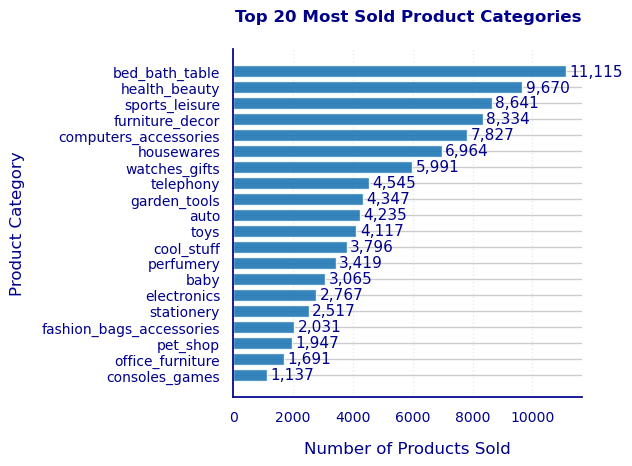

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Set consistent font styling (corrected parameters)
plt.rcParams.update({
    'font.family': 'sans-serif',  # Use 'Arial' if available
    'font.size': 11,
    'font.weight': 'normal',
    'axes.titlesize': 12,
    'axes.titleweight': 'bold',
    'axes.labelcolor': 'darkblue',
    'xtick.color': 'darkblue',
    'ytick.color': 'darkblue',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Exclude "Unknown" category
df1_filtered = df1[df1['product_category_name_english'] != 'Unknown']

# Get top 20 products by count
top_20_products = (df1_filtered['product_category_name_english']
                  .value_counts()
                  .nlargest(20)
                  .sort_values(ascending=True))

# Create plot
plt.figure(figsize=(12, 10))
fig, ax = plt.subplots()

# Plot horizontal bars
bars = ax.barh(top_20_products.index, top_20_products.values, 
              color='#1f77b4', alpha=0.9)

# Formatting with dark blue axis labels and ticks
plt.title('Top 20 Most Sold Product Categories', 
          pad=20, color='darkblue')
plt.xlabel('Number of Products Sold', 
           labelpad=12, color='darkblue')
plt.ylabel('Product Category', 
           labelpad=12, color='darkblue')

# Customize ticks
ax.tick_params(axis='both', colors='darkblue')

# Add value labels
for i, v in enumerate(top_20_products.values):
    ax.text(v + max(top_20_products.values)*0.01, 
           i, 
           f"{v:,}", 
           va='center',
           color='darkblue')

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('darkblue')
ax.spines['bottom'].set_color('darkblue')

# Add grid lines
ax.grid(axis='x', linestyle=':', alpha=0.4, color='lightblue')

plt.tight_layout()
plt.show()

/tmp/ipykernel_266535/2801011196.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['total_sales'] = df1_filtered['price'] + df1_filtered['freight_value']


<Figure size 2000x2000 with 0 Axes>

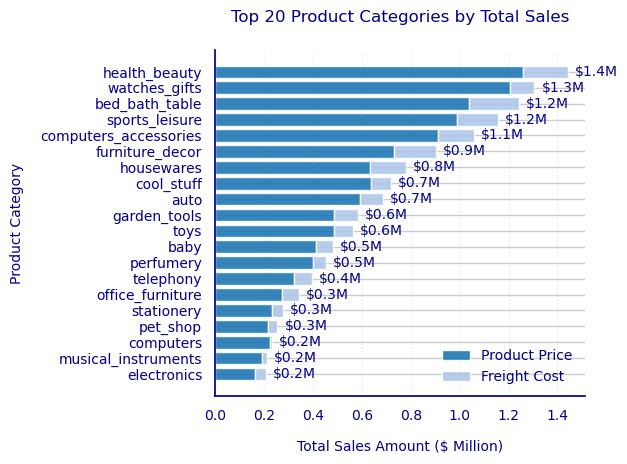

In [41]:
import matplotlib.pyplot as plt
import numpy as np

font_settings = {'family': 'Arial', 'size': 11, 'weight': 'normal', 'color': 'darkblue'}

# Exclude "Unknown" category
df1_filtered = df1[df1['product_category_name_english'] != 'Unknown']

# Calculate total sales per category (price + freight_value)
df1_filtered['total_sales'] = df1_filtered['price'] + df1_filtered['freight_value']

# Get top 20 categories by total sales (in millions)
top_20 = (df1_filtered.groupby('product_category_name_english')['total_sales']
           .sum()
           .nlargest(20)
           .sort_values(ascending=True)/1e6)  # Convert to millions

# Get price and freight components for these top 20 categories (in millions)
sales_price = (df1_filtered.groupby('product_category_name_english')['price']
              .sum()[top_20.index]/1e6)
sales_freight = (df1_filtered.groupby('product_category_name_english')['freight_value']
                .sum()[top_20.index]/1e6)

# Create plot with improved proportions
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()

# Plot stacked bars with enhanced colors
price_bars = ax.barh(top_20.index, sales_price, 
                    color='#1f77b4', alpha=0.9, label='Product Price')
freight_bars = ax.barh(top_20.index, sales_freight, 
                      left=sales_price, color='#aec7e8', alpha=0.9, label='Freight Cost')

# Formatting with dark blue axis labels and ticks
plt.title('Top 20 Product Categories by Total Sales', 
          fontsize=12, pad=20, color='darkblue')
plt.xlabel('Total Sales Amount ($ Million)', 
           fontsize=10, labelpad=12, color='darkblue')
plt.ylabel('Product Category', 
           fontsize=10, labelpad=12, color='darkblue')

# Customize ticks to dark blue
ax.tick_params(axis='both', which='both', colors='darkblue', labelsize=10)

# Add clean, formatted value labels in dark blue
for i, (price_val, freight_val) in enumerate(zip(sales_price, sales_freight)):
    total = price_val + freight_val
    ax.text(total + max(top_20)*0.02,  # Position slightly right of bar
           i, 
           f"${total:,.1f}M", 
           va='center',
           fontsize=10,
           color='darkblue')

# Add legend with dark blue text
legend = plt.legend(frameon=False, fontsize=10)
for text in legend.get_texts():
    text.set_color('darkblue')

# Remove top and right spines and color remaining spines dark blue
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('darkblue')
ax.spines['bottom'].set_color('darkblue')

# Add grid lines in light blue
ax.grid(axis='x', linestyle=':', alpha=0.4, color='lightblue')

plt.tight_layout()
plt.show()

The Top 20 by sales amount differ from the Top 20 by quantity sold because expensive products bring in more money but are sold less frequently. For example, Fashion_male_clothing ranks high in sales amount due to its high price but not in quantity sold. This suggests that in regions like Brazil and Europe, males prefer to buy quality, expensive clothes.